In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from plotly import express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/mydrive/MyDrive/Data Mining/research 2/smoking.csv')
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [ ]:
df.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

###Visualisasi

<Axes: ylabel='count'>

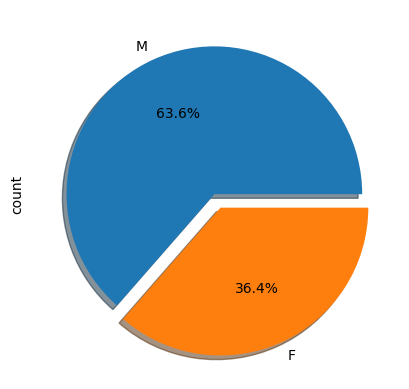

In [ ]:
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

<Axes: ylabel='count'>

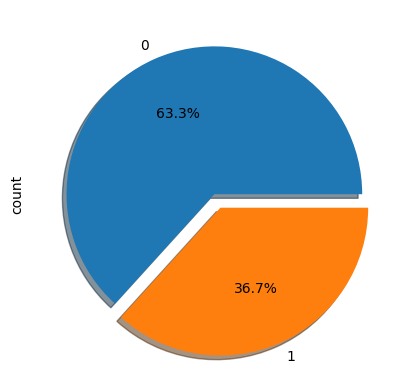

In [ ]:
df['smoking'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

In [ ]:
X_train = pd.read_csv('/content/mydrive/MyDrive/Data Mining/research 2/grup/x_train.csv')
X_test = pd.read_csv('/content/mydrive/MyDrive/Data Mining/research 2/grup/x_test.csv')
y_train = pd.read_csv('/content/mydrive/MyDrive/Data Mining/research 2/grup/y_train.csv')
y_test = pd.read_csv('/content/mydrive/MyDrive/Data Mining/research 2/grup/y_test.csv')

In [ ]:
X_train.info()
y_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44553 entries, 0 to 44552
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   44553 non-null  int64  
 1   gender               44553 non-null  object 
 2   age                  44553 non-null  int64  
 3   height(cm)           44553 non-null  int64  
 4   weight(kg)           44553 non-null  int64  
 5   waist(cm)            44553 non-null  float64
 6   eyesight(left)       44553 non-null  float64
 7   eyesight(right)      44553 non-null  float64
 8   hearing(left)        44553 non-null  float64
 9   hearing(right)       44553 non-null  float64
 10  systolic             44553 non-null  float64
 11  relaxation           44553 non-null  float64
 12  fasting blood sugar  44553 non-null  float64
 13  Cholesterol          44553 non-null  float64
 14  triglyceride         44553 non-null  float64
 15  HDL                  44553 non-null 

In [ ]:
X_train

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0.0,Y
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0.0,Y
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0.0,N
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0.0,Y
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44548,55686,M,50,170,65,88.0,1.2,1.2,1.0,1.0,...,108.0,15.2,1.0,1.0,45.0,49.0,51.0,Y,0.0,Y
44549,55687,M,35,175,70,84.0,0.6,0.7,1.0,1.0,...,118.0,15.2,1.0,0.9,20.0,14.0,16.0,Y,0.0,Y
44550,55688,M,35,175,70,70.9,1.5,1.5,1.0,1.0,...,92.0,13.4,1.0,1.0,18.0,19.0,10.0,Y,0.0,Y
44551,55689,M,50,165,90,106.8,0.8,0.5,1.0,1.0,...,104.0,14.5,1.0,0.9,30.0,49.0,40.0,Y,0.0,Y


In [ ]:
y_train

,ID,smoking
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
44548,55686,0
44549,55687,0
44550,55688,0
44551,55689,1


In [ ]:
X_test

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,8,M,80,160,65,91.0,0.9,0.7,1.0,1.0,...,94.0,14.5,1.0,1.0,29.0,19.0,39.0,Y,0.0,N
1,17,M,30,165,90,98.0,1.5,1.5,1.0,1.0,...,165.0,15.6,1.0,0.9,20.0,37.0,34.0,Y,0.0,N
2,20,M,40,170,75,81.0,1.5,1.5,1.0,1.0,...,98.0,16.4,1.0,0.7,25.0,32.0,73.0,Y,0.0,N
3,24,M,35,175,70,80.0,1.0,1.0,1.0,1.0,...,160.0,15.3,1.0,0.7,30.0,55.0,50.0,Y,0.0,N
4,25,M,35,160,75,93.0,1.0,1.2,1.0,1.0,...,132.0,14.7,1.0,1.1,35.0,58.0,56.0,Y,0.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11134,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,Y,1.0,Y
11135,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,Y,0.0,Y
11136,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,Y,0.0,N
11137,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,Y,0.0,N


In [ ]:
X_train = X_train.drop(columns = 'ID')
y_train = y_train.drop(columns = 'ID')
id = X_test['ID']
X_test = X_test.drop(columns = 'ID')

In [ ]:
print(X_train.shape, X_test.shape)

(44553, 25) (11139, 25)


In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train.select_dtypes(exclude='object').columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'gender_F', 'gender_M', 'oral_Y',
       'tartar_N', 'tartar_Y'],
      dtype='object')

In [ ]:
scale = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries']

In [ ]:
X_train[scale] = scaler.fit_transform(X_train[scale])

In [ ]:
X_test[scale] = scaler.transform(X_test[scale])

In [ ]:
X_tr,X_val,y_tr,y_val = train_test_split(X_train.values, y_train.values, stratify=y_train, test_size = 0.2, random_state=0)

##Random Forest

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7036
           1       0.92      0.94      0.93      4103

    accuracy                           0.95     11139
   macro avg       0.94      0.95      0.94     11139
weighted avg       0.95      0.95      0.95     11139



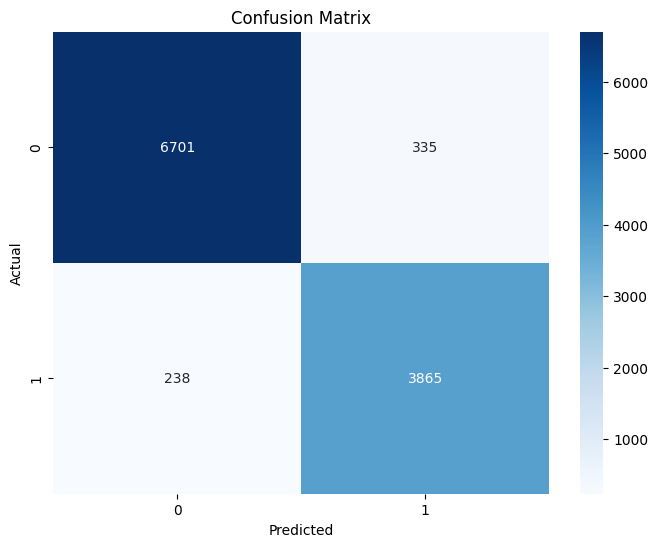

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_tr, y_tr)
pred = rf.predict(X_test)
print(classification_report(y_test['smoking'], pred))
cm = confusion_matrix(y_test['smoking'], pred)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##SVM

              precision    recall  f1-score   support

           0       0.84      0.73      0.78      7036
           1       0.62      0.76      0.68      4103

    accuracy                           0.74     11139
   macro avg       0.73      0.74      0.73     11139
weighted avg       0.76      0.74      0.74     11139



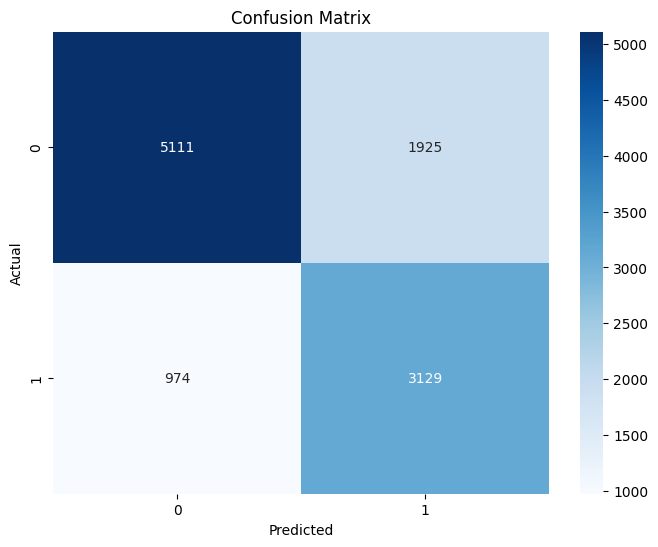

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_tr, y_tr)
pred1 = svm_model.predict(X_test)
print(classification_report(y_test['smoking'], pred1))
cm = confusion_matrix(y_test['smoking'], pred1)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##DecesionTree

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7036
           1       0.91      0.92      0.92      4103

    accuracy                           0.94     11139
   macro avg       0.93      0.93      0.93     11139
weighted avg       0.94      0.94      0.94     11139



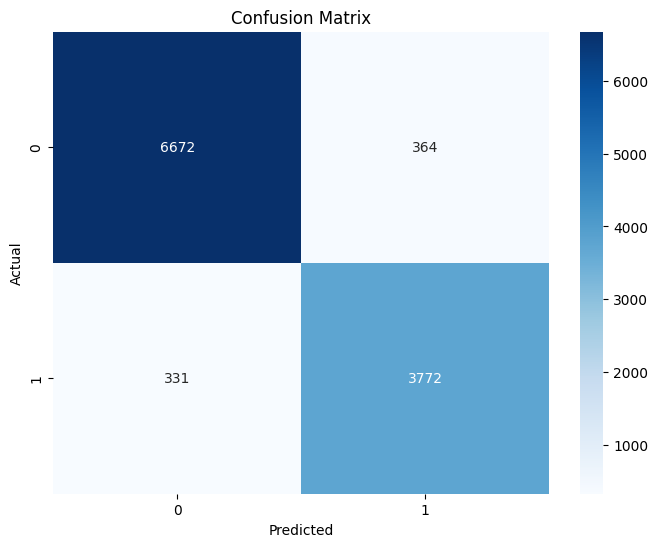

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_tr, y_tr)

y_pred = DTC.predict(X_test)
print(classification_report(y_test['smoking'], y_pred))
cm = confusion_matrix(y_test['smoking'], y_pred)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##KNN

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7036
           1       0.91      0.90      0.91      4103

    accuracy                           0.93     11139
   macro avg       0.93      0.93      0.93     11139
weighted avg       0.93      0.93      0.93     11139



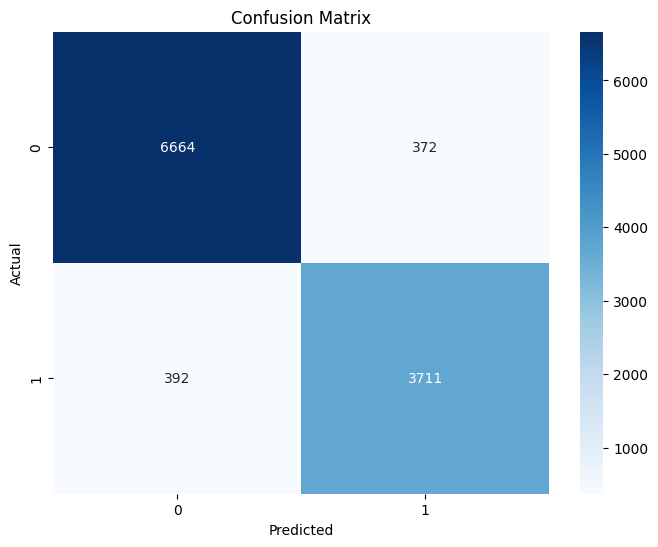

In [ ]:
# Menampilkan laporan klasifikasi
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_tr, y_tr)
hasil = knn.predict(X_test)
print(classification_report(y_test['smoking'], hasil))
cm = confusion_matrix(y_test['smoking'], hasil)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##Naive Bayes

              precision    recall  f1-score   support

           0       0.91      0.60      0.72      7036
           1       0.57      0.89      0.69      4103

    accuracy                           0.71     11139
   macro avg       0.74      0.75      0.71     11139
weighted avg       0.78      0.71      0.71     11139



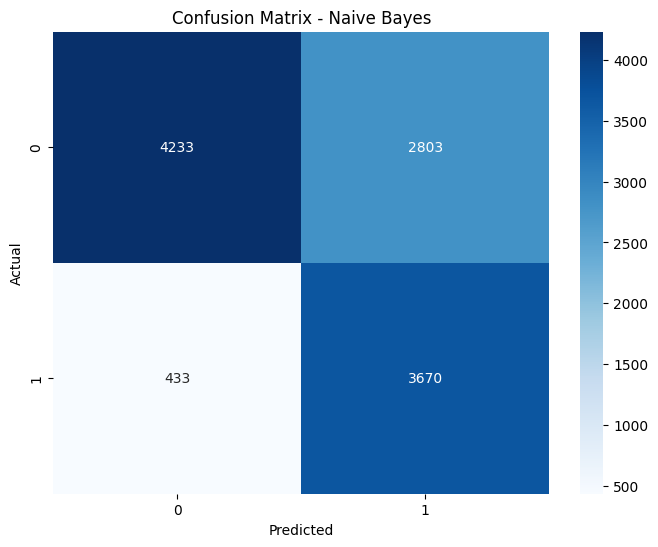

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_tr, y_tr)

# Make predictions on the test data
pred_nb = nb_model.predict(X_test)

# Print classification report
print(classification_report(y_test['smoking'], pred_nb))

# Calculate confusion matrix
cm_nb = confusion_matrix(y_test['smoking'], pred_nb)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

##Save Model terbaik

In [ ]:
import pickle
pickle.dump(rf, open("modelrf.pkl", "wb"))